In [94]:
import numpy as np
import scipy.io.wavfile as wav
from python_speech_features import mfcc
from tempfile import TemporaryFile
import os
import math
import pickle
import random
import operator
import librosa

In [95]:
import pandas as pd
df=pd.read_csv('features_30_sec.csv')
df=df.drop(['filename'],axis=1)
Y=df['label']
X=df.drop(['label'],axis=1)

In [96]:
#Normalization
for column in X.columns:
    X[column]=(X[column]-X[column].mean())/X[column].std()

In [68]:
Y.value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

BLUES


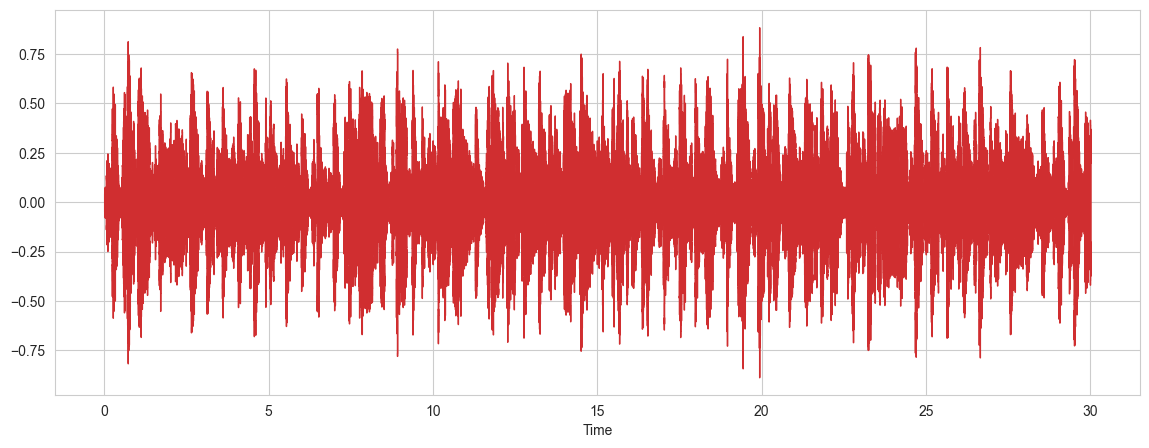

In [69]:
import matplotlib.pyplot as plt
import librosa
plt.figure(figsize=(14,5))
x,sr=librosa.load(r"C:\Users\Deesha\OneDrive\Desktop\Major Project\blues\blues.00000.wav")
librosa.display.waveshow(x, sr=sr)
print("BLUES")

Classical


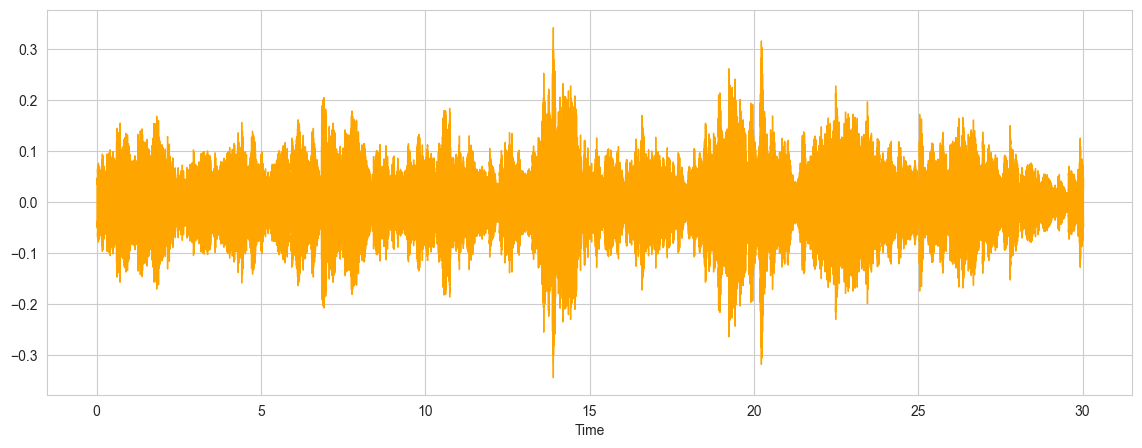

In [70]:
plt.figure(figsize=(14,5))
x,sr=librosa.load(r"C:\Users\Deesha\OneDrive\Desktop\Major Project\classical\classical.00000.wav")
librosa.display.waveshow(x, sr=sr,color='orange')
print("Classical")

Country


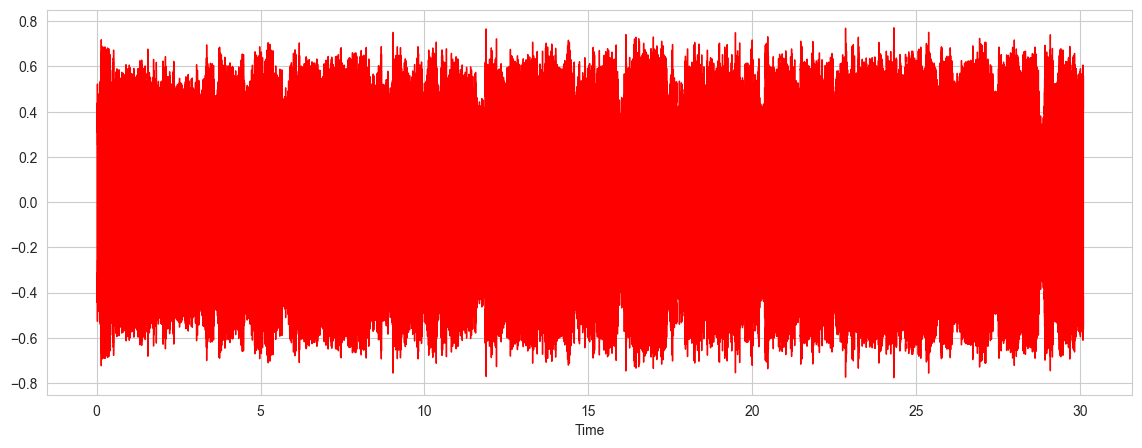

In [71]:
plt.figure(figsize=(14,5))
x,sr=librosa.load(r"C:\Users\Deesha\OneDrive\Desktop\Major Project\country\country.00000.wav")
librosa.display.waveshow(x, sr=sr,color='red')
print("Country")

Disco


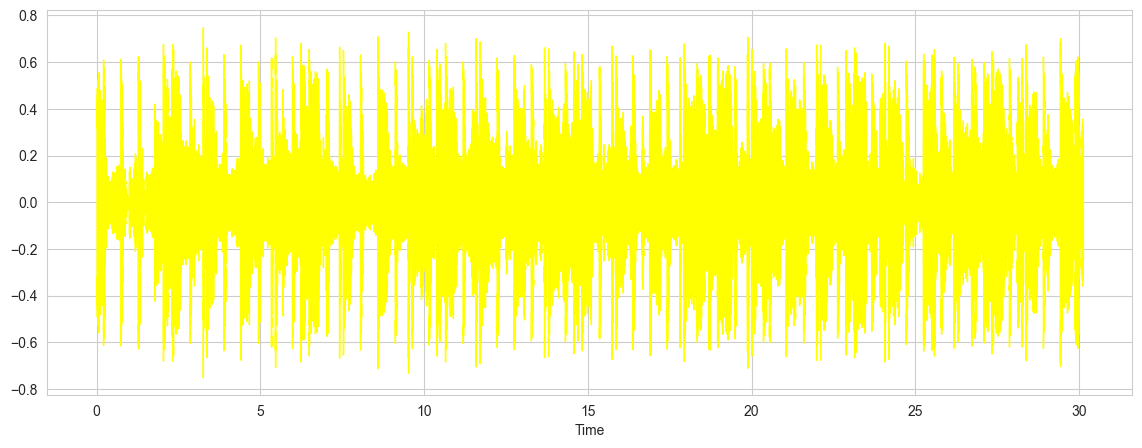

In [72]:
plt.figure(figsize=(14,5))
x,sr=librosa.load(r"C:\Users\Deesha\OneDrive\Desktop\Major Project\disco\disco.00000.wav")
librosa.display.waveshow(x, sr=sr,color='yellow')
print("Disco")

Hiphop


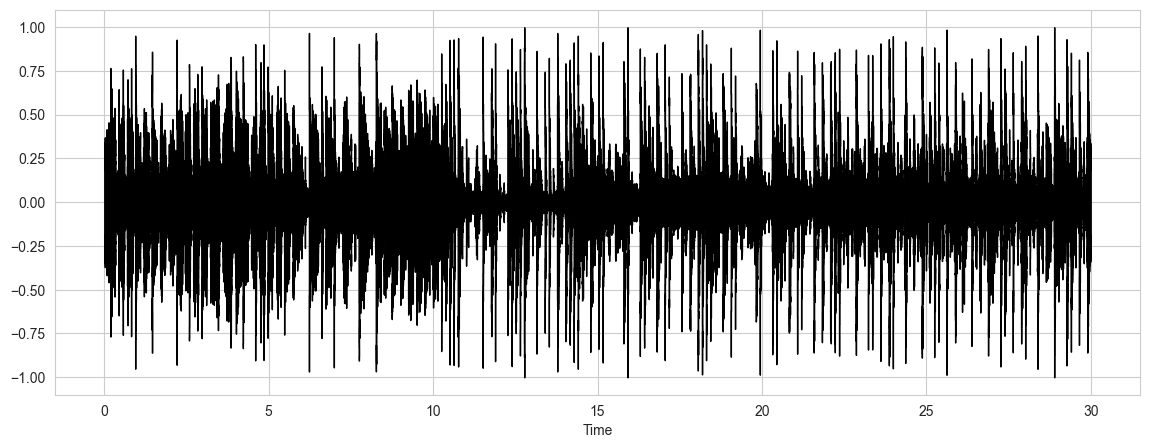

In [73]:
plt.figure(figsize=(14,5))
x,sr=librosa.load(r"C:\Users\Deesha\OneDrive\Desktop\Major Project\hiphop\hiphop.00000.wav")
librosa.display.waveshow(x, sr=sr,color='Black')
print("Hiphop")

Jazz


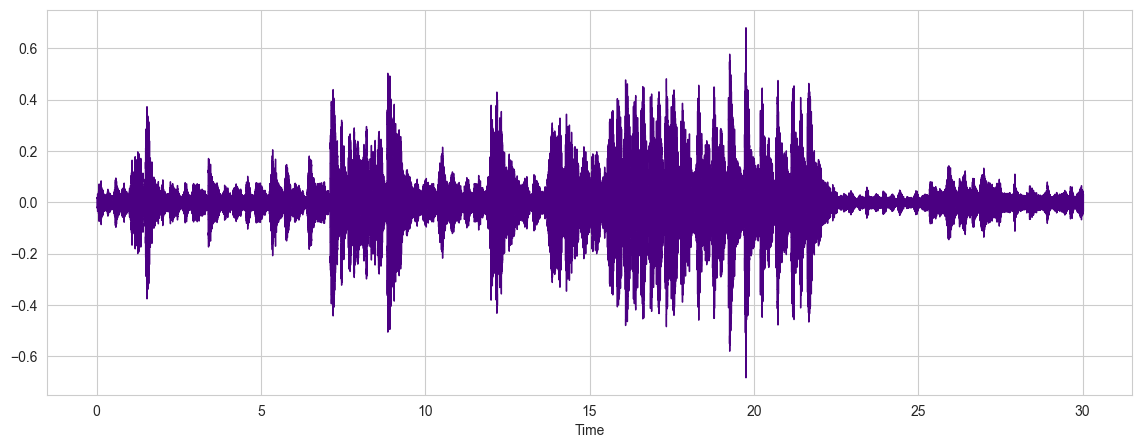

In [74]:
plt.figure(figsize=(14,5))
x,sr=librosa.load(r"C:\Users\Deesha\OneDrive\Desktop\Major Project\jazz\jazz.00000.wav")
librosa.display.waveshow(x, sr=sr,color='indigo')
print("Jazz")

Metal


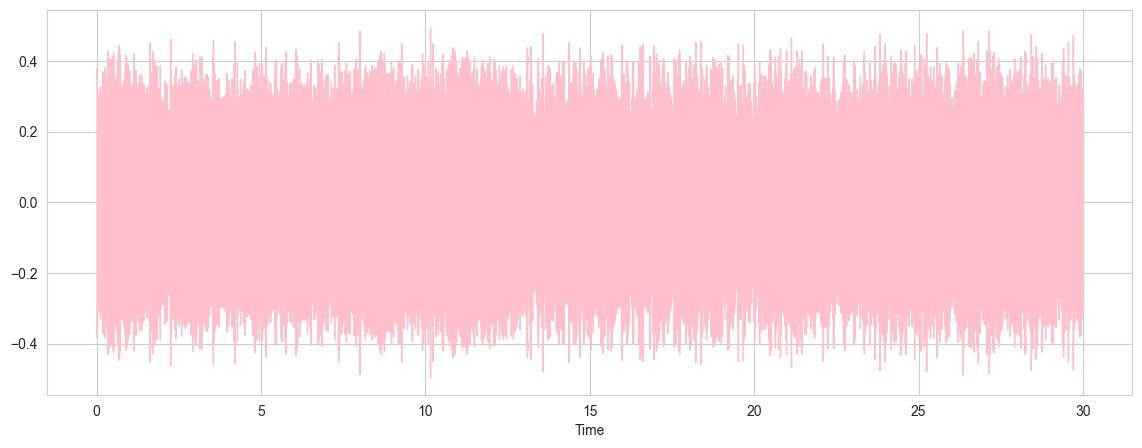

In [75]:
plt.figure(figsize=(14,5))
x,sr=librosa.load(r"C:\Users\Deesha\OneDrive\Desktop\Major Project\metal\metal.00000.wav")
librosa.display.waveshow(x, sr=sr,color='pink')
print("Metal")

Pop


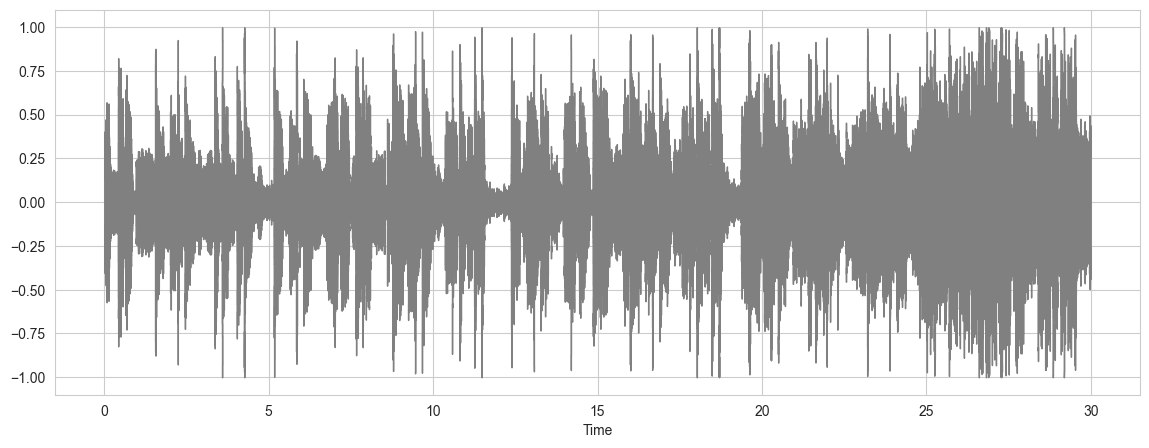

In [76]:
plt.figure(figsize=(14,5))
x,sr=librosa.load(r"C:\Users\Deesha\OneDrive\Desktop\Major Project\pop\pop.00000.wav")
librosa.display.waveshow(x, sr=sr,color='grey')
print("Pop")

Reggae


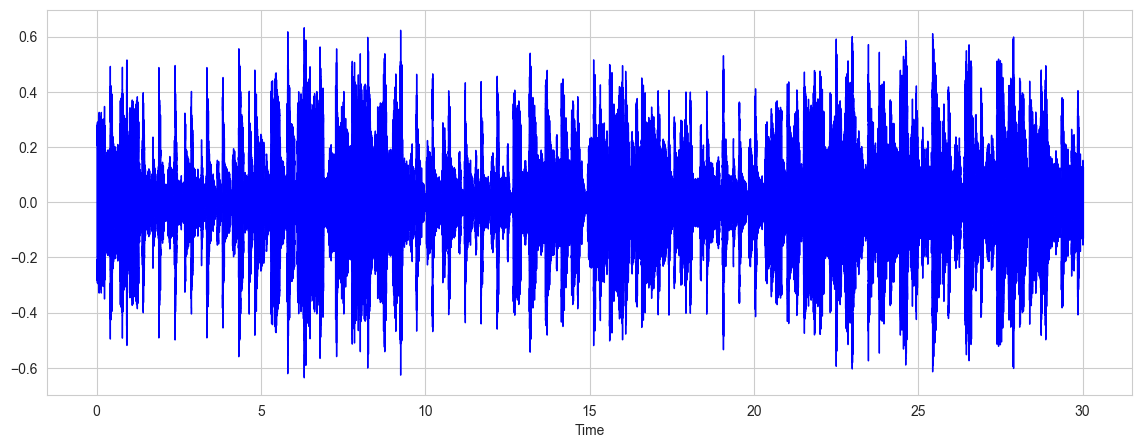

In [77]:
plt.figure(figsize=(14,5))
x,sr=librosa.load(r"C:\Users\Deesha\OneDrive\Desktop\Major Project\reggae\reggae.00000.wav")
librosa.display.waveshow(x, sr=sr,color='blue')
print("Reggae")

Rock


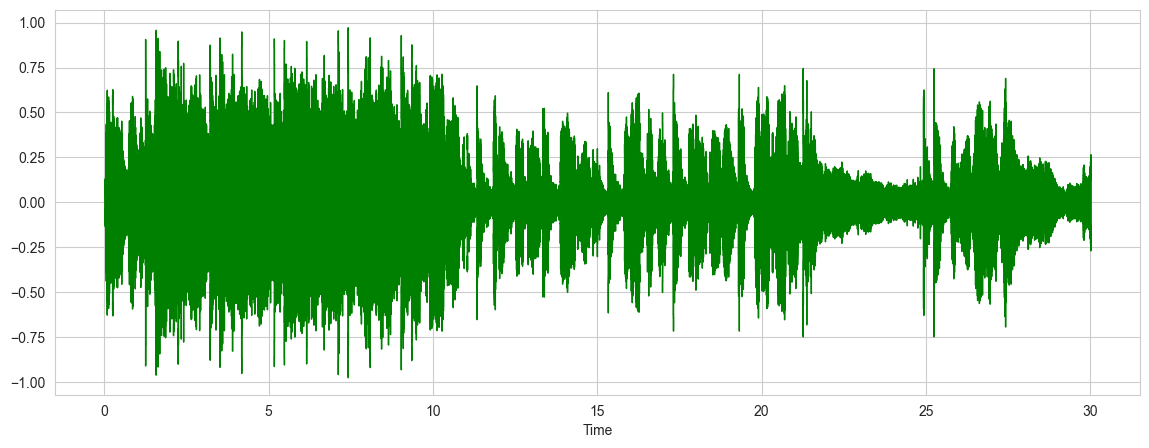

In [78]:
plt.figure(figsize=(14,5))
x,sr=librosa.load(r"C:\Users\Deesha\OneDrive\Desktop\Major Project\rock\rock.00000.wav")
librosa.display.waveshow(x, sr=sr,color='green')
print("Rock")

In [79]:
dataset=X
dataset['label']=Y

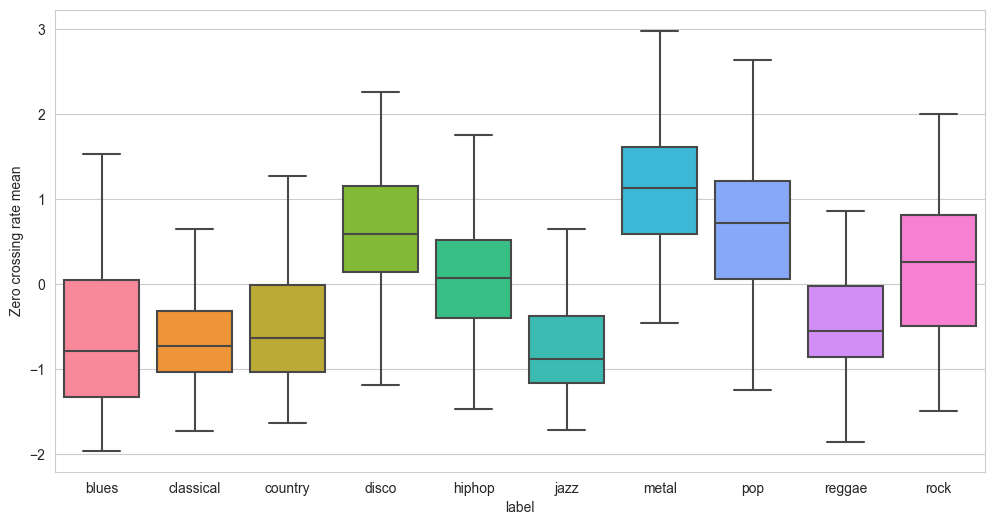

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.boxplot(x='label', y='zero_crossing_rate_mean',data=dataset, showfliers=False, saturation=1)
plt.ylabel('Zero crossing rate mean')
#plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
#plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
#plt.xticks(rotation=90)
plt.show()

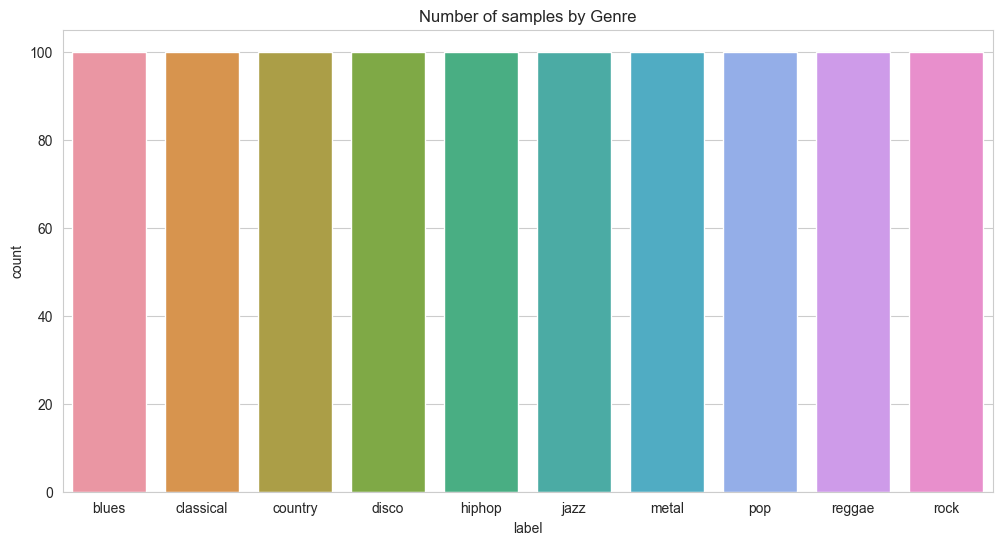

In [81]:
#Data is well balanced
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x = 'label', data = dataset)
plt.title('Number of samples by Genre')
plt.show()

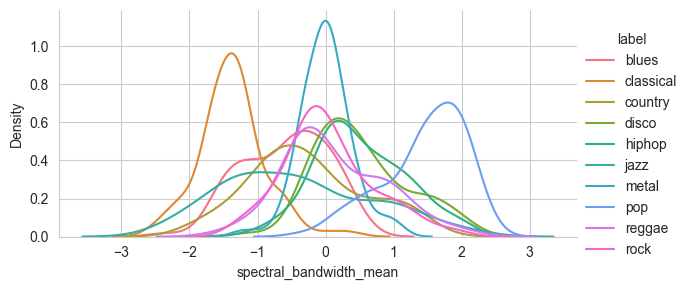

In [82]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(dataset, hue='label', aspect=2)
facetgrid.map(sns.kdeplot,'spectral_bandwidth_mean').add_legend()
plt.show()

In [83]:
#MANUALLY IMPLEMENTING KNN AND MAKING PREDICTIONS

#function to calculate the distance between feature vectors
def dis(inst1,inst2,k):
    dis=0
    mm1=inst1[0]
    cm1=inst1[1]
    mm2=inst2[0]
    cm2=inst2[1]
    dis=np.trace(np.dot(np.linalg.inv(cm2),cm1))
    dis+=(np.dot(np.dot((mm2-mm1).transpose(),np.linalg.inv(cm2)),mm2-mm1))
    dis+=np.log(np.linalg.det(cm2))-np.log(np.linalg.det(cm1))
    dis-=k
    return dis

#function to get the distance between feature vectors and find neighbors
def getNeighbors(trainingset,instance,k):
    dist2=[]
    for x in range(len(trainingset)):
        distance = dis(trainingset[x],instance,k)+dis(instance,trainingset[x],k)
        dist2.append((trainingset[x][2],distance))
    dist2.sort(key=operator.itemgetter(1))
    neighbors=[]
    for x in range(k):
        neighbors.append(dist2[x][0])
    return neighbors

#function to identify the nearest neighbors
def nearestclass(neighbors):
    cv={}
    for x in range(len(neighbors)):
        res=neighbors[x]
        if res in cv:
            cv[res]+=1
        else:
            cv[res]=1
    sorter=sorted(cv.items(),key=operator.itemgetter(1),reverse=True)
    return sorter[0][0]

In [84]:
#Accuracy function
def getAccuracy(testSet, prediction):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == prediction[x]:
            correct += 1
    return 1.0 * correct / len(testSet)


In [85]:
#Feature Extraction
directory='C:/Users/MUSICS'
f = open("MUSICS", "wb")
i=0
for folder in os.listdir(directory):
    i+=1
    if i == 11:
        break
    for file in os.listdir(directory+'/'+folder):
        #print(file)
        if file.endswith('.wav'):
            try:
                [sig,rate]=librosa.load('C:/Users/MUSICS/'+folder+'/'+file)
                mfcc_feat=mfcc(sig,rate,winlen = 0.020, appendEnergy=False)
                covarience=np.cov(np.matrix.transpose(mfcc_feat))
                mean_matrix=mfcc_feat.mean(0)
                feature=(mean_matrix,covarience,i)
                pickle.dump(feature,f)
            except Exception as e:
                print(e)

C:\Users\Deesha\AppData\Local\Temp\ipykernel_11472\1505243754.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  [sig,rate]=librosa.load('C:/Users/MUSICS/'+folder+'/'+file)
C:\Users\Deesha\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [86]:
#train-test and split dataset
dataset = []
def loaddata(fname,split,trset,teset):
    with open('MUSICS','rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break
        for x in range(len(dataset)):
            if random.random() < split:
                trset.append(dataset[x])
            else:
                teset.append(dataset[x])
            
trainingSet=[]
testSet=[]
loaddata('MUSICS',0.68,trainingSet,testSet)

#test with new audio
from collections import defaultdict
results = defaultdict(int)

directory = 'C:/Users/MUSICS'
i = 1
for folder in os.listdir(directory):
    results[i] = folder
    i += 1
pred = nearestclass(getNeighbors(dataset,feature,12))
print(results[pred])

rock


In [87]:
#Creating list for storing accuracy to plot graph
acc=[]

In [88]:
# Make the prediction using KNN1
length = len(testSet)
predictions = []
for x in range(length):
    predictions.append(nearestclass(getNeighbors(trainingSet, testSet[x], 12)))
accuracy1 = getAccuracy(testSet, predictions)
acc.append(accuracy1)
print(accuracy1)

0.6708074534161491


In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.32)

In [98]:
labels=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [99]:
#Code for confusion matrix

import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    #if normalize:
        #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    ax = plt.gca()
    ax.set_ylim()
        
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Text(0, 0.5, 'Error Rate')

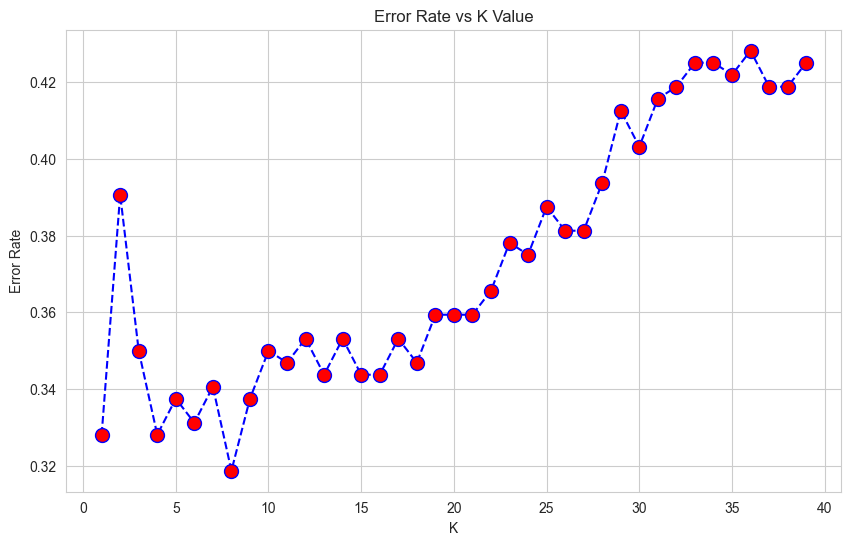

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,40):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,Y_train)
    pred_i=knn1.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [101]:
#Implementing KNN2 with classifier

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [102]:
knn_pred=knn.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc.append(accuracy_score(Y_test,knn_pred))
accuracy_score(Y_test,knn_pred)

0.659375

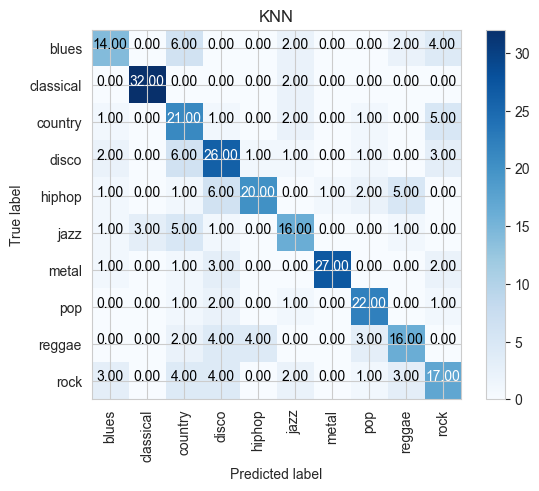

In [104]:
plot_confusion_matrix(confusion_matrix(Y_test,knn_pred),classes=labels,normalize=True,title='KNN')

In [105]:
#implementing Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [106]:
dt_pred=dt.predict(X_test)
acc.append(accuracy_score(Y_test,dt_pred))
accuracy_score(Y_test,dt_pred)

0.590625

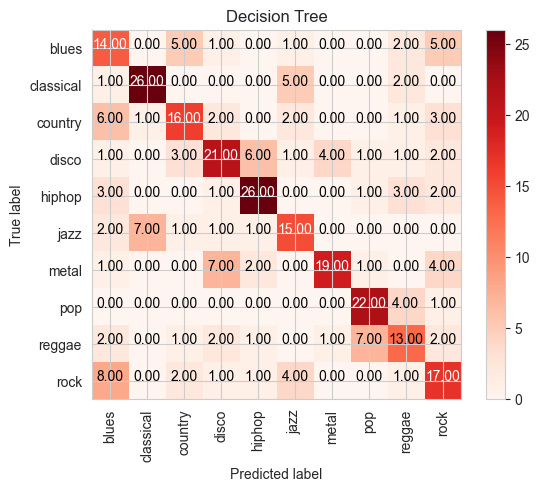

In [107]:
plot_confusion_matrix(confusion_matrix(Y_test,dt_pred),classes=labels,normalize=True,title='Decision Tree',cmap=plt.cm.Reds)

In [108]:
#Implementing Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [109]:
rf_pred=rf.predict(X_test)
acc.append(accuracy_score(Y_test,rf_pred))
accuracy_score(Y_test,rf_pred)

0.7875

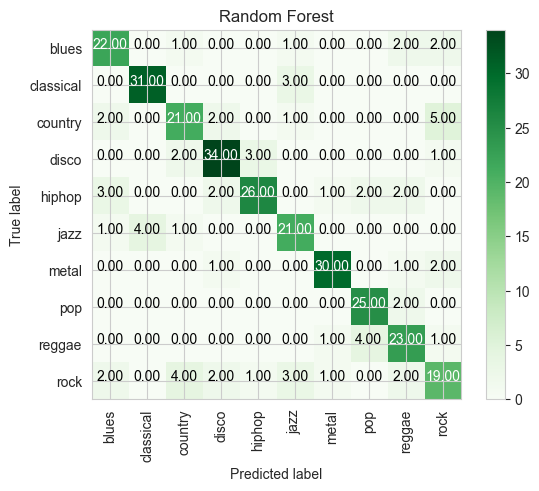

In [110]:
plot_confusion_matrix(confusion_matrix(Y_test,rf_pred),classes=labels,normalize=True,title='Random Forest',cmap=plt.cm.Greens)

In [111]:
#Implementing Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [112]:
gnb_pred=gnb.predict(X_test)
acc.append(accuracy_score(Y_test,gnb_pred))
accuracy_score(Y_test,gnb_pred)

0.5625

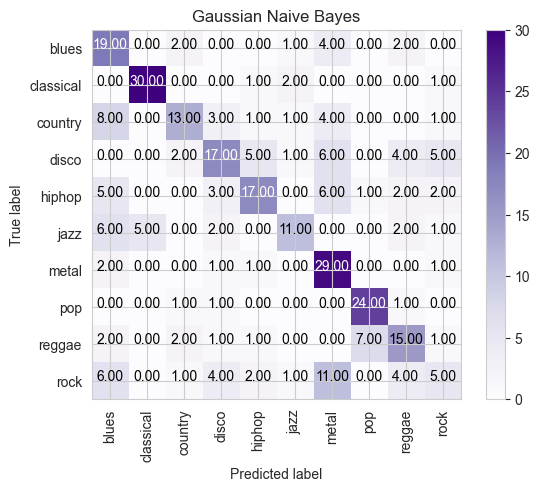

In [113]:
plot_confusion_matrix(confusion_matrix(Y_test,gnb_pred),classes=labels,normalize=True,title='Gaussian Naive Bayes',cmap=plt.cm.Purples)

In [114]:
classifiers=['KNN (Manual)', 'KNN', 'Decision Tree','Random Forest','Gaussian Naive Bayes']

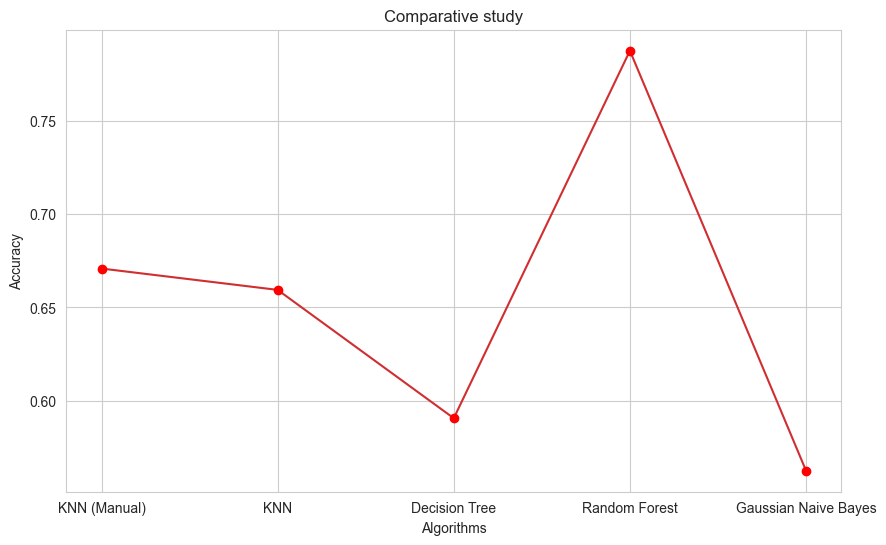

In [115]:
plt.figure(figsize=(10,6))
plt.plot(classifiers,acc,marker='o',markeredgecolor='red',markerfacecolor='red')
plt.xlabel('Algorithms')
# naming the y axis
plt.ylabel('Accuracy')
  
# giving a title to my graph
plt.title('Comparative study')
  
# function to show the plot
plt.show()